# Распознование рукописных чисел с помощью Tensorflow, Keras, и готового датасета MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Подготовка данных и нормализация ($x \in{[0, 1]}$)

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

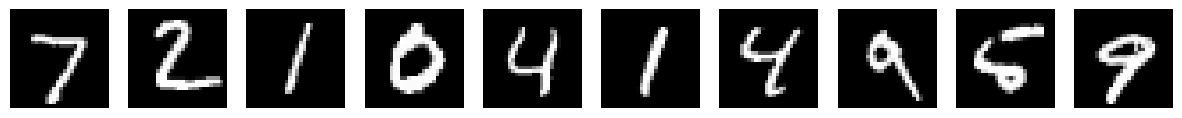

In [3]:
fig, axs = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axs[i].imshow(x_test[i], cmap='gray')
    axs[i].axis('off')
plt.show()

Преобразование массива из матрицы в вектор - `Flatten`

Полносвязный слой, состоящий из 128 нейронов с функцией активации `ReLU`

Слой `Dropout` случайным образом "выключает" определенное количество нейронов в предыдущем слое с заданной вероятностью. Это помогает предотвратить переобучение и делает модель более устойчивой к шуму в данных.

В данном случае `Dense` - будет выходным слоем, и количество нейронов соответствует количеству классов, которые модель должна предсказывать.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Для каждого примера модель возвращает вектор оценок [логитов](https://developers.google.com/machine-learning/glossary?authuser=2&hl=ru#logits) или логарифмических шансов , по одному для каждого класса.

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.6481693 ,  0.5382487 , -0.04032182,  0.6328578 , -0.21596476,
        -0.12394668,  0.2166339 ,  0.31606728, -0.26645613, -0.49203083]],
      dtype=float32)

Функция `tf.nn.softmax` преобразует эти логиты в вероятности для каждого класса, где:

_Логит - это логарифм отношения вероятности события к вероятности его отсутствия. Логит используется в статистике и машинном обучении для моделирования бинарных или категориальных данных, таких как прогнозирование вероятности успеха или неудачи в определенной задаче._

$$ \operatorname{logit}(p) = \ln\left(\frac{p}{1-p}\right) $$

Здесь $\ln$ обозначает натуральный логарифм, 

$p$ - вероятность наступления события, 

а $\operatorname{logit}(p)$ - логит вероятности $p$.

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.08089852, 0.08554524, 0.0680751 , 0.09944173, 0.13275778,
        0.15662073, 0.16542782, 0.08992975, 0.06098136, 0.06032193]],
      dtype=float32)

`SparseCategoricalCrossentropy` - это функция потерь, которая вычисляет расхождение между предсказанными значениями модели и истинными метками классов в многоклассовой классификации.

В отличие от CategoricalCrossentropy, которая принимает векторы [one-hot](https://ru.wikipedia.org/wiki/%D0%A3%D0%BD%D0%B8%D1%82%D0%B0%D1%80%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D0%B4) в качестве истинных меток классов, SparseCategoricalCrossentropy принимает целочисленные метки классов. Для каждого примера из набора данных SparseCategoricalCrossentropy преобразует целочисленную метку класса в вектор one-hot.

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
loss_fn(y_train[:1], predictions).numpy()

1.8539281

`Adam` - это оптимизационный алгоритм, который используется для обучения нейронных сетей. Он является комбинацией метода градиентного спуска первого порядка и метода адаптивного градиентного спуска, что позволяет ему эффективно и быстро находить оптимальные значения параметров модели.

Метрика `accuracy`, которая показывает, как часто модель правильно классифицирует примеры. Она вычисляется как отношение числа правильных предсказаний к общему числу примеров.


In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

`Model fit` - обучение сети

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2923 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1421 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1069 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0855 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0746 - accuracy: 0.9770


Model.evaluate проверяет производительность моделей

In [29]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 0s 983us/step - loss: 0.0738 - accuracy: 0.9783


[0.07375681400299072, 0.9782999753952026]

Вероятность моделей

In [13]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probabilities = probability_model(x_test[:5])

for i in range(5):
    max_prob = np.max(probabilities[i])
    max_index = np.argmax(probabilities[i])
    print(f"Пример {i + 1}: максимальная вероятность = {max_prob:.2f}, индекс класса = {max_index}")


Пример 1: максимальная вероятность = 1.00, индекс класса = 7
Пример 2: максимальная вероятность = 1.00, индекс класса = 2
Пример 3: максимальная вероятность = 1.00, индекс класса = 1
Пример 4: максимальная вероятность = 1.00, индекс класса = 0
Пример 5: максимальная вероятность = 1.00, индекс класса = 4


# Версия с наследованием класса

In [33]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(32, 3, activation='relu')
    self.flatten = tf.keras.layers.Flatten()
    self.d1 = tf.keras.layers.Dense(128, activation='relu')
    self.d2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)


train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
      # training=True is only needed if there are layers with different
      # behavior during training versus inference (e.g. Dropout).
      predictions = model(images, training=True)
      loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)


EPOCHS = 5

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    print(
      f'Epoch {epoch + 1}, '
      f'Loss: {train_loss.result()}, '
      f'Accuracy: {train_accuracy.result() * 100}, '
      f'Test Loss: {test_loss.result()}, '
      f'Test Accuracy: {test_accuracy.result() * 100}'
    )

1875/1875 [==============================] - 40s 21ms/step - loss: 0.1378 - accuracy: 0.9587



----------------
_Batch (пакет) - это группа примеров из набора данных, которые обрабатываются одновременно в процессе обучения нейронной сети._

_Batch size (размер пакета) - это количество примеров из набора данных, которые обрабатываются одновременно в каждом пакете в процессе обучения нейронной сети._

При обучении нейронной сети, данные разбиваются на пакеты определенного размера, и каждый пакет обрабатывается последовательно. Обработка пакетов позволяет нейронной сети обучаться на больших наборах данных, не требуя слишком большого объема памяти.

Размер пакета может быть выбран в зависимости от доступных ресурсов, таких как объем доступной памяти и производительность оборудования, а также от требований конкретной задачи и оптимального размера пакета для этой задачи.



```python
import numpy as np

# Представляем данные в виде тензора размерности (длина тензора, ширина, высота, количество каналов)
data = np.zeros((1000, 32, 32, 3))

# Размер пакета
batch_size = 64

# Цикл по пакетам
for i in range(0, len(data), batch_size):
    batch = data[i:i+batch_size]
    # Обработка пакета, вычисление градиентов, обновление весов

```
----------------
